In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_df = sns.load_dataset('titanic')
taxis_df = sns.load_dataset('taxis')

# Part a.
## Examining Data Types and Structures

In [3]:
# 1a. 
# To check dtypes, use .type() on a column or .types() on the df:
titanic_df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
titanic_df['survived'].dtype

dtype('int64')

In [5]:
# 2a. 
# Use .info() on a df to find out how many non-null values each column have + columns dtypes and more info:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 3a.
# To verify numeric columns, use .describe() and .to_numeric()
# Use .describe to check basic statistics.
# Use .to_numeric() on a specific numeric column to find out potential issues with numeric data;
# such as incorrect dtype, presence of non-numeric values, and range of values.
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [8]:
# errors='?':
# 'coerce' -> coercing errors to NaN
# 'raise' -> raises error
pd.to_numeric(titanic_df['age'], errors='coerce')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [9]:
# 4a.
# To check unique values in categorical columns:
# Use .unique() to see the unique values in the column.
# Use .value_counst() to see the unique values and their frequency in the column.
# Note that by using .value_counts(), you cannot see the null values; but .unique() shows the null values.
titanic_df["sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
titanic_df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
titanic_df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
# Sometimes, mixed dtypes make a lot of problems.
# For example, having Unkown in a column makes difficalty in handling the data,
# (A categorical/str data in a supposed to be numeric column).
# To solve this problem, we can change the non-sence values to more valid values based on our work.
sample_df = pd.DataFrame({
    'Name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee', 'David Brown', 'Eva White', 'Frank Black', 'Grace Green'],
    'Age': [28, 34, 'Unknown', 42, 'Unknown', 36, 30],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio'],
    'Salary': [70000, 80000, 65000, 120000, 50000, 90000, 75000]
    },
    index=np.arange(1, 8))
sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,Los Angeles,80000
3,Charlie Lee,Unknown,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,Unknown,Phoenix,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [13]:
sample_df['Age'].describe()

count           7
unique          6
top       Unknown
freq            2
Name: Age, dtype: object

In [14]:
sample_df['Age'].unique()

array([28, 34, 'Unknown', 42, 36, 30], dtype=object)

In [15]:
sample_df['Age'] = sample_df['Age'].where(sample_df['Age'] != 'Unknown', np.nan)

In [16]:
sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,Los Angeles,80000
3,Charlie Lee,NaN,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,NaN,Phoenix,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [17]:
# 5a.
# To filter the df based on specific dtypes (for example to apply some functions or methods that
# only works on sepcific dtypes), use .select_dtypes(include=[''])
titanic_df.select_dtypes(include=['category', 'int'])

,survived,pclass,sibsp,parch,class,deck
0,0,3,1,0,Third,NaN
1,1,1,1,0,First,C
2,1,3,0,0,Third,NaN
3,1,1,1,0,First,C
4,0,3,0,0,Third,NaN
...,...,...,...,...,...,...
886,0,2,0,0,Second,NaN
887,1,1,0,0,First,B
888,0,3,1,2,Third,NaN
889,1,1,0,0,First,C


In [18]:
# 6a.
# To see the memory usage each column takes (for example for optimization),
# use .memory_usage()
titanic_df.memory_usage()

Index           132
survived       7128
pclass         7128
sex            7128
age            7128
sibsp          7128
parch          7128
fare           7128
embarked       7128
class          1023
who            7128
adult_male      891
deck           1247
embark_town    7128
alive          7128
alone           891
dtype: int64

In [19]:
# Note that categorical data use much less memory,
# try to converte heavy dtypes to categorical dtype for better performance.
titanic_df.dtypes
# (compare dtypes of each column to their memory usage)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [20]:
# 7a.
# Identifying and Handling Mixed dtypes:
def mixed_dtypes_detector(df):
    mixed_dtypes = {}
    for column in df.columns:
        types = df[column].apply(lambda x: type(x).__name__).value_counts()
        if len(types) > 1:
            mixed_dtypes[column] = types.to_dict()
            
    return mixed_dtypes

mixed_dtypes_detector(titanic_df)

{'embarked': {'str': 889, 'float': 2}, 'embark_town': {'str': 889, 'float': 2}}

In [21]:
# After handling mixed dtypes, check what percentage of data was lost.
# This gives you a hint on what to do with the data or the feature itself.

In [22]:
# Example for handling mixed numeric and string data:
def clean_numeric_column(series):
    numeric_series = pd.to_numeric(series, errors='coerce')
    
    percent_lost = (series.dropna().size - numeric_series.count()) / series.size * 100
    print(f"Percentage of data lost: {percent_lost:.2f}%")
    
    return numeric_series

In [23]:
# To handle mixed date types, we can use "dateparser" module.

In [24]:
# 8a.
# Ensuring Data Integrity During Loading:
# When we load a dataset from somewhere (like loading as a csv file), the dtypes may not be
# as we like. We can specify dtypes during loading:
dtypes_for_titanic_df = {
    "PassengerId": "int64",
    "Survived": "int64",
    "Pclass": "int64",
    "Name": "object",
    "Sex": "category",
    "Age": "float64",
    "SibSp": "int64",
    "Parch": "int64",
    "Ticket": "object",
    "Fare": "float64",
    "Cabin": "object",
    "Embarked": "category",
}
path = '/home/mseifoori/Machine-Learning-Exercises/data/titanic.csv'
titanic_df = pd.read_csv(path, dtype=dtypes_for_titanic_df, na_values=['NA', 'Unknown', ''], keep_default_na=True)

In [25]:
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [26]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Part b.
## Handling Missing Data

In [27]:
# 1b.
# We can use 'missingno' module to visualize missing data.
import missingno as msno

In [28]:
# 2b. 
# Types of Missing Values:
# -> Missing Completely at Random (MCAR)
# -> Missing at Random (MAR)
# -> Missing Not at Random (MNAR)

# MCAR:
# The "best" type of missing data because it doesn't introduce bias into your analysis.
# Occurs when the probability of data being missing is the same for all observations.
# In other words, there's no relationship between whether a data point is missing and any values in the dataset, observed or missing.

# MAR:
# MAR is more common than MCAR in real-world datasets.
# Occurs when the probability of missing data on a variable Y depends on other observed variables, but not on the values of Y itself.
# The key characteristic of MAR is that the missingness is related to observed data but not to the missing data itself.
# The pattern of missingness is predictable from other variables in the dataset.

# MNAR:
# MNAR is the most problematic type of missing data because it can introduce significant bias into your analysis.
# Occurs when the probability of missing data on a variable Y is related to the values of Y itself, even after controlling for other variables.

In [29]:
titanic_df = sns.load_dataset('titanic')

In [30]:
# 3b.
# Basic info about missing values:
def missing_values_info(df):
    missing_values = df.isnull().sum()
    missing_values_percentage = round(((missing_values / len(df)) * 100), 3)
    missing_values_table = pd.concat(
        [missing_values, missing_values_percentage],
        keys=['Missing Count', 'Missing Percentage'],
        axis=1
    )
    
    return missing_values_table

missing_values_info(titanic_df)

,Missing Count,Missing Percentage
survived,0,0.000
pclass,0,0.000
sex,0,0.000
age,177,19.865
sibsp,0,0.000
parch,0,0.000
fare,0,0.000
embarked,2,0.224
class,0,0.000
who,0,0.000


Text(0.5, 1.0, 'Matrix Plot of Missing Values')

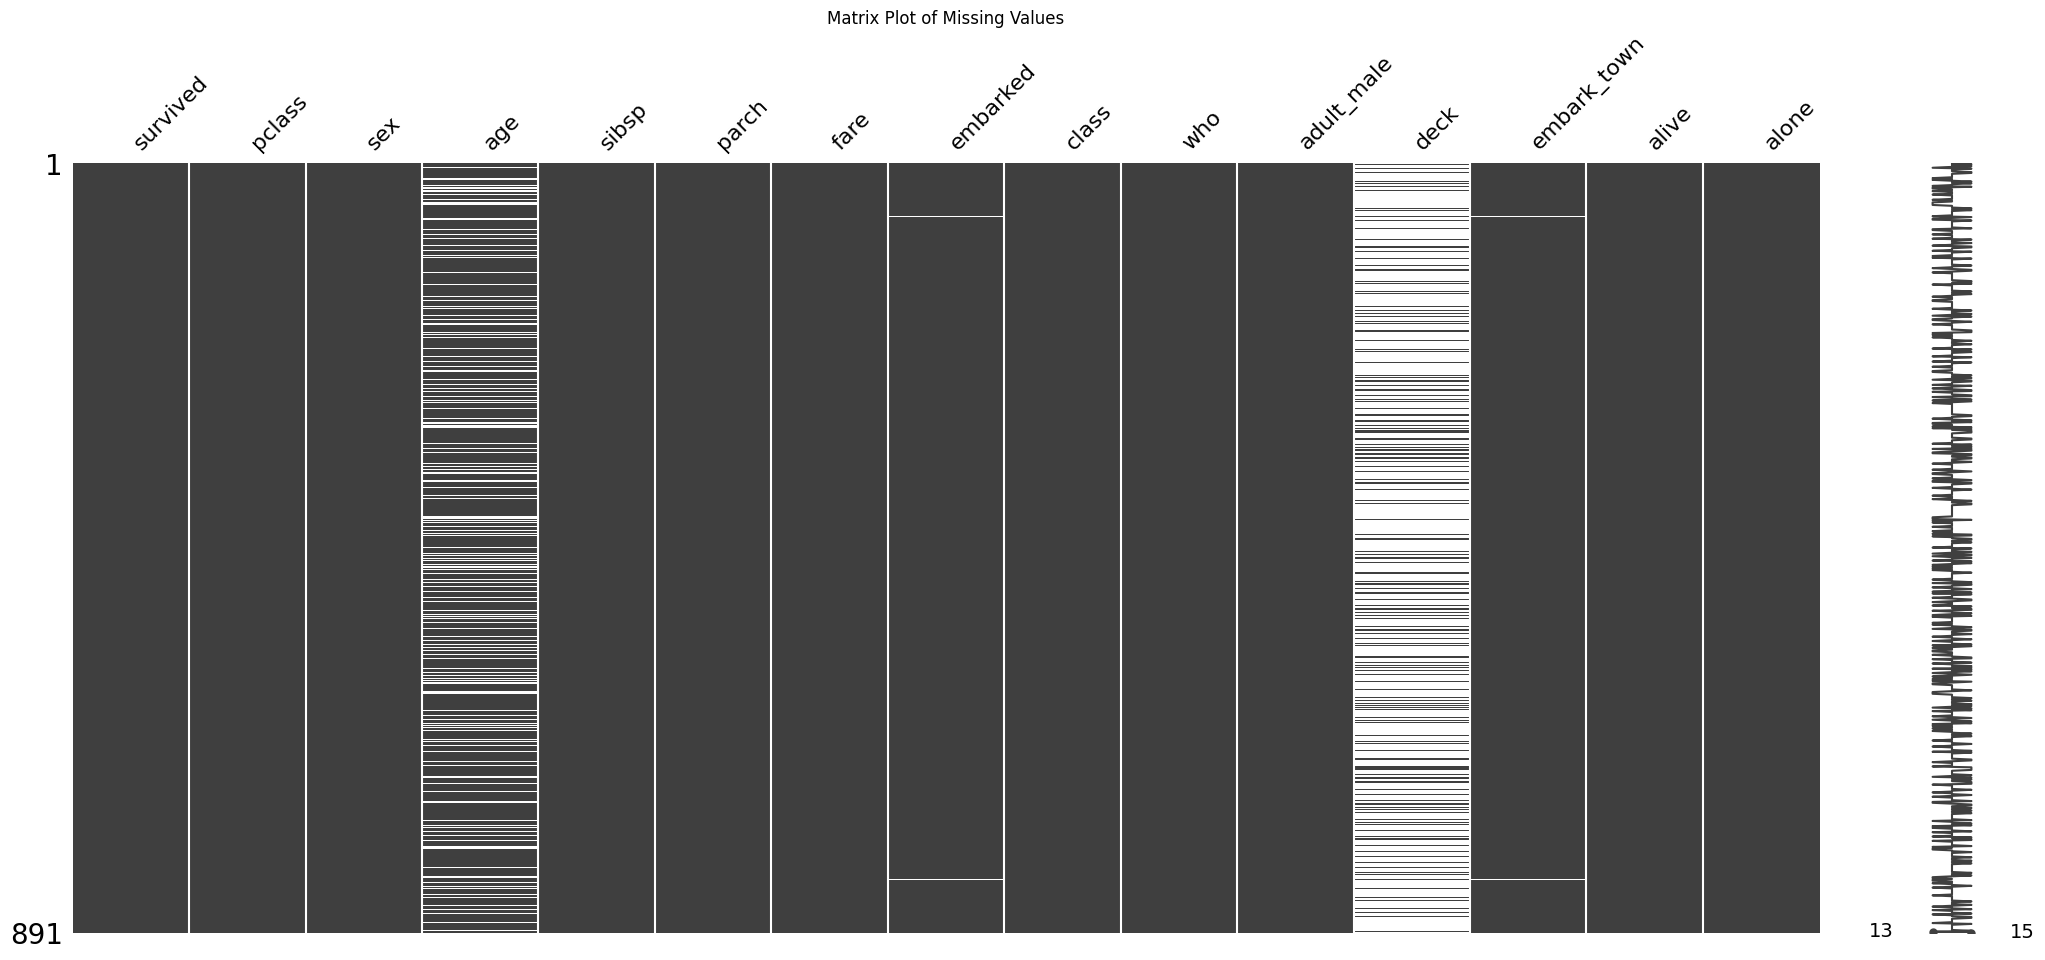

In [31]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(titanic_df)
plt.title('Matrix Plot of Missing Values')

In [32]:
# 4b. Detecting Hidden Missing Values:
def suspicious_values_detector(df, suspicious_values, inplace_replace=False):
    results = []
    for column in df.columns:
        value_counts = df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts.index:
                count = value_counts.loc[value]
                results.append(
                    f'Column {column} contains {count} instances of {value}.'
                )
    if inplace_replace == True:
        for column in df.columns:
            for suspicious_value in suspicious_values:
                df[column] = df[column].where(df[column] != suspicious_value, np.nan)
        return df
    
    return results

In [33]:
# 5b.
# Simple Imputation Techniques:
# 1) Fill the missing value of a numeric column with mean or median.
# Note: The median is preferable to the mean because, unlike the median, the mean can be significantly influenced by outliers.
titanic_df['age'] = pd.to_numeric(titanic_df['age'], errors='coerce')
titanic_df['age'].fillna(titanic_df['age'].mean())
titanic_df['age'].fillna(titanic_df['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

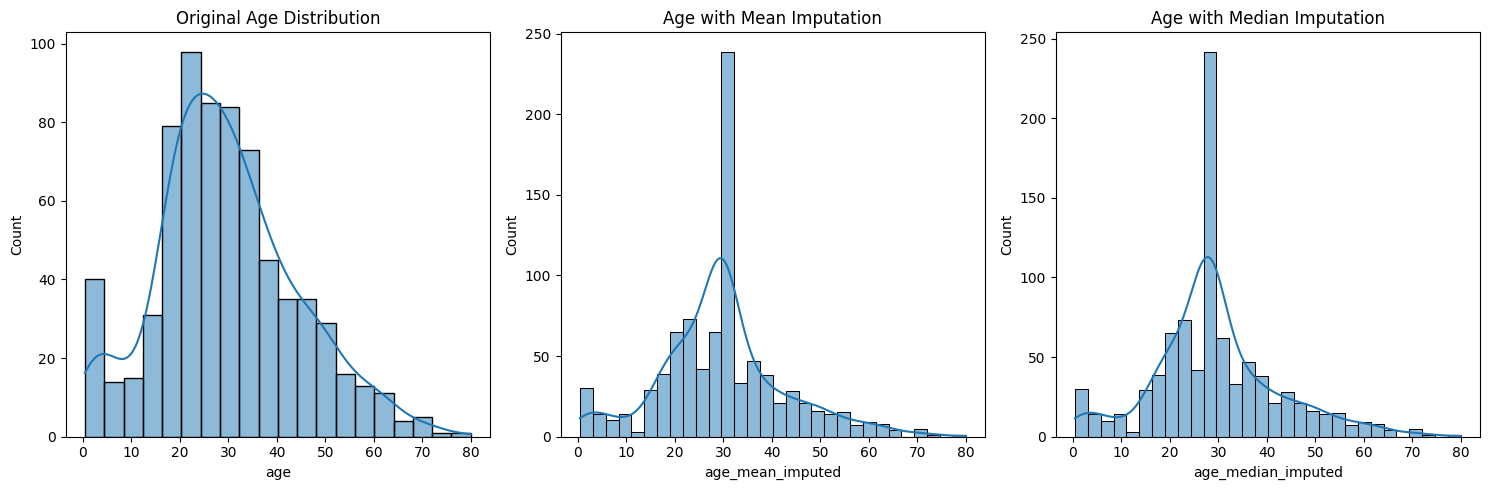

In [34]:
# After visualizing the dataset following the imputation of missing values, 
# a distinct and pronounced spike becomes apparent. This is not a desirable outcome.
titanic_df["age_mean_imputed"] = titanic_df["age"].fillna(titanic_df["age"].mean())
titanic_df["age_median_imputed"] = titanic_df["age"].fillna(titanic_df["age"].median())
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(titanic_df['age'], kde=True, ax=ax1)
ax1.set_title('Original Age Distribution')

sns.histplot(titanic_df['age_mean_imputed'], kde=True, ax=ax2)
ax2.set_title('Age with Mean Imputation')

sns.histplot(titanic_df['age_median_imputed'], kde=True, ax=ax3)
ax3.set_title('Age with Median Imputation')

plt.tight_layout()

In [35]:
# This issue can be partially mitigated by binning the data based on other variables,
# which distributes the pronounced spike into several smaller, more dispersed spikes.
titanic_df[titanic_df['sex'] == 'male']['age'].median()

np.float64(29.0)

In [36]:
# Fill the missing value of a categorical column with mode.
# Note: A series of categorical data can have more than 1 mode;
# you have to select one to fill the missing values with.
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [37]:
# 6b.
# Imputating using Algorithms
# ! Learn "Regression Imputation", "KNN Imputation" and "Multiple Imputation" while learning scikit-learn.

In [38]:
# 7b.
# Time Series Imputation:
# We can fill the missing values using "forward fill (ffill)", "backward fill (bfill)" and "interpolate":
taxis_df["pickup"].ffill()
taxis_df["pickup"].bfill()
taxis_df["pickup"].interpolate()

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]